# Checkpoint 1

## Carregar módulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime


sns.set(style="whitegrid")

## Carregar dados

In [2]:
path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
path_dead = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [3]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [4]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [5]:
dados_paises_covid.rename(
    columns={"Province/State": "province", "Country/Region": "country"}, inplace=True
)

In [6]:
dados_paises_covid_dead.rename(
    columns={"Province/State": "province", "Country/Region": "country"}, inplace=True
)

In [7]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [8]:
dados_paises_covid = dados_paises_covid.melt(
    id_vars=["province", "country", "Lat", "Long"],
    var_name="date",
    value_name="infected",
)

In [9]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(
    id_vars=["province", "country", "Lat", "Long"], var_name="date", value_name="dead"
)

In [10]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [11]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [12]:
dados_paises_covid["date"] = pd.to_datetime(
    dados_paises_covid["date"], infer_datetime_format="True"
)

In [13]:
dados_paises_covid_dead["date"] = pd.to_datetime(
    dados_paises_covid_dead["date"], infer_datetime_format="True"
)

In [14]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [15]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [16]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [17]:
dados_paises_covid.shape

(330327, 6)

In [18]:
dados_paises_covid_dead.shape

(330327, 6)

In [19]:
dados_covid = pd.merge(
    dados_paises_covid,
    dados_paises_covid_dead,
    on=["province", "country", "Lat", "Long", "date"],
    how="inner",
)

In [20]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [21]:
dados_covid.shape

(330327, 7)

## Aqui começa o trabalho

## 1) Quantos países existem no banco de dados?

In [22]:
paises = dados_covid["country"]

nao_paises = [
    "Diamond Princess",
    "Summer Olympics 2020",
    "Winter Olympics 2022",
    "MS Zaandam",
]

paises_filtrados = paises[~paises.isin(nao_paises)]

quantidade_de_paises = len(paises_filtrados.unique())
quantidade_de_paises

197

#### Resposta: 197 (09/03/2023)

## 2) Quantos casos de infectados e mortes Brasil, Itália e E.U.A. possuem até o momento?

In [23]:
dia_mais_recente = str(dados_covid["date"].iloc[-1])[:10]
dia_mais_recente

'2023-03-09'

In [24]:
brasil_infectados = int(
    dados_covid[
        (dados_covid["country"] == "Brazil") & (dados_covid["date"] == dia_mais_recente)
    ]["infected"]
)

In [25]:
us_infectados = int(
    dados_covid[
        (dados_covid["country"] == "US") & (dados_covid["date"] == dia_mais_recente)
    ]["infected"]
)

In [26]:
italia_infectados = int(
    dados_covid[
        (dados_covid["country"] == "Italy") & (dados_covid["date"] == dia_mais_recente)
    ]["infected"]
)

In [27]:
brasil_mortes = int(
    dados_covid[
        (dados_covid["country"] == "Brazil") & (dados_covid["date"] == dia_mais_recente)
    ]["dead"]
)

In [28]:
us_mortes = int(
    dados_covid[
        (dados_covid["country"] == "US") & (dados_covid["date"] == dia_mais_recente)
    ]["dead"]
)

In [29]:
italia_mortes = int(
    dados_covid[
        (dados_covid["country"] == "Italy") & (dados_covid["date"] == dia_mais_recente)
    ]["dead"]
)

In [30]:
infectados = [brasil_infectados, us_infectados, italia_infectados]
mortes = [brasil_mortes, us_mortes, italia_mortes]
_paises = ["Brasil", "Estados Unidos", "Itália"]

_dados = zip(infectados, mortes, _paises)

for i, m, p in _dados:
    print(
        f"{p} - infectados: {i}, mortes: {m}, média de mortalidade: {round((m/i)*100, 2)}%"
    )

Brasil - infectados: 37076053, mortes: 699276, média de mortalidade: 1.89%
Estados Unidos - infectados: 103802702, mortes: 1123836, média de mortalidade: 1.08%
Itália - infectados: 25603510, mortes: 188322, média de mortalidade: 0.74%


#### Resposta:
Brasil - infectados: 29978513, mortes: 660265, média: 2.2%

Estados Unidos - infectados: 80140309, mortes: 982371, média: 1.23%

Itália - infectados: 14719394, mortes: 159537, média: 1.08%

## 3) Quais os 10 países que possuem os maiores valores de infectados? E quais os 10 de maiores mortes?

In [31]:
ultimo_dia = dados_paises_covid[dados_covid["date"] == dia_mais_recente]

In [32]:
ultimo_dia = (
    ultimo_dia.sort_values("infected", ascending=False).drop_duplicates().head(10)
)
ultimo_dia[["country", "infected"]]

,country,infected
330298,US,103802702
330186,India,44690738
330169,France,38618509
330173,Germany,38249060
330069,Brazil,37076053
330194,Japan,33320438
330200,"Korea, South",30615522
330192,Italy,25603510
330316,United Kingdom,24425309
330259,Russia,22075858


In [33]:
ultimo_dia_dead = dados_paises_covid_dead[dados_covid["date"] == dia_mais_recente]
ultimo_dia_dead = ultimo_dia_dead.sort_values(by="dead", ascending=False).head(10)
ultimo_dia_dead[["country", "dead"]]

,country,dead
330298,US,1123836
330069,Brazil,699276
330186,India,530779
330259,Russia,388478
330223,Mexico,333188
330316,United Kingdom,219948
330253,Peru,219539
330192,Italy,188322
330173,Germany,168935
330169,France,161512


## 4) Criar uma coluna denominada taxa de mortalidade (mortos/infectados). Quais os 10 países que  possuem  maiores  valores  desta  taxa?  Você  acredita  que a  taxa  de  mortalidade  uma  boa métrica? Quais vieses você conseguiu perceber?

### Taxa de mortalidade é uma boa métrica?

A taxa de mortalidade <b>não</b> é uma boa métrica, afinal, pode-se ver que o país com o maior indice de taxa de mortalidade é o Yemen, que teve poucos casos de infecção comparado com outros países que são maiores. Um país tão pequeno não deve ter grande relevância pois, utilizando ele como referência, temos uma média de 18% de mortalidade, o que é completamente fora da realidade; a real taxa de mortalidade é inferior a 2%.

In [34]:
dados_covid["taxa_de_mortalidade"] = dados_covid["dead"].div(dados_covid["infected"])

In [35]:
dados_filtrados = dados_covid.drop(
    dados_covid.index[(dados_covid["country"] == "MS Zaandam")]
)
dados_filtrados = dados_filtrados.drop(
    dados_covid.index[(dados_covid["province"] == "Diamond Princess")]
)

In [36]:
dados_filtrados[dados_filtrados["date"] == dia_mais_recente].sort_values(
    "taxa_de_mortalidade", ascending=False
).head(10)

,province,country,Lat,Long,date,infected,dead,taxa_de_mortalidade
330199,NaN,"Korea, North",40.339900,127.510100,2023-03-09,1,6,6.000000
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159,0.180745
330281,NaN,Sudan,12.862800,30.217600,2023-03-09,63829,5017,0.078601
330110,Hubei,China,30.975600,112.270700,2023-03-09,72131,4515,0.062594
330286,NaN,Syria,34.802075,38.996815,2023-03-09,57467,3164,0.055058
330127,Unknown,China,NaN,NaN,2023-03-09,1521816,82195,0.054011
330276,NaN,Somalia,5.152149,46.199616,2023-03-09,27324,1361,0.049810
330253,NaN,Peru,-9.190000,-75.015200,2023-03-09,4487553,219539,0.048922
330149,NaN,Egypt,26.820553,30.802498,2023-03-09,515759,24812,0.048108
330223,NaN,Mexico,23.634500,-102.552800,2023-03-09,7483444,333188,0.044523


## 5) Gere os seguintes gráficos:

### A) Gráfico de linhas contendo a evolução do número de infectados do Brasil e Estados Unidos. 

In [37]:
df_us = dados_covid[(dados_covid["country"] == "US")]

In [38]:
df_br = dados_covid[(dados_covid["country"] == "Brazil")]

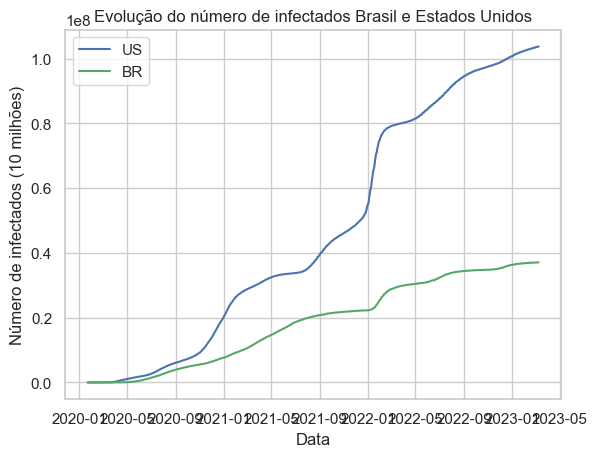

In [39]:
plt.plot(df_us["date"], df_us["infected"], color="b", label="US")
plt.plot(df_br["date"], df_br["infected"], color="g", label="BR")
plt.xlabel("Data")
plt.ylabel("Número de infectados (10 milhões)")
plt.title("Evolução do número de infectados Brasil e Estados Unidos")
plt.legend()
plt.show()

### b) Gráfico de linhas contendo a evolução do número de mortos do Brasil e Estados Unidos.

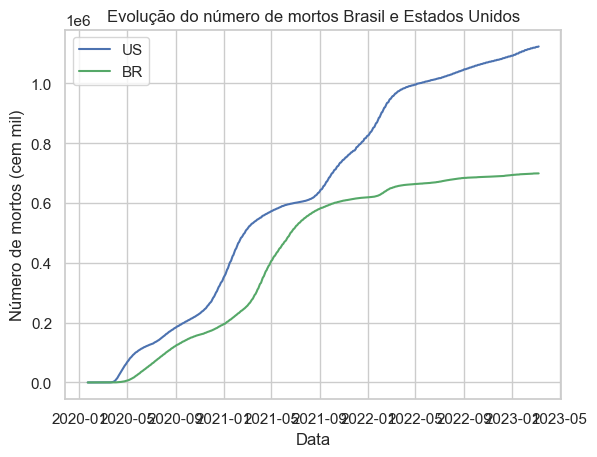

In [40]:
plt.plot(df_us["date"], df_us["dead"], color="b", label="US")
plt.plot(df_br["date"], df_br["dead"], color="g", label="BR")
plt.xlabel("Data")
plt.ylabel("Número de mortos (cem mil)")
plt.title("Evolução do número de mortos Brasil e Estados Unidos")
plt.legend()
plt.show()

### c) Gráfico de barras comparando o número de  infectados de Brasil e Estados Unidos em 20/mar.

In [41]:
br_infectados = [
    int(df_br[df_br["date"] == "2022-03-20"]["infected"]),
    int(df_br[df_br["date"] == "2021-03-20"]["infected"]),
]
us_infectados = [
    int(df_us[df_us["date"] == "2022-03-20"]["infected"]),
    int(df_us[df_us["date"] == "2021-03-20"]["infected"]),
]
anos = [2022, 2021]

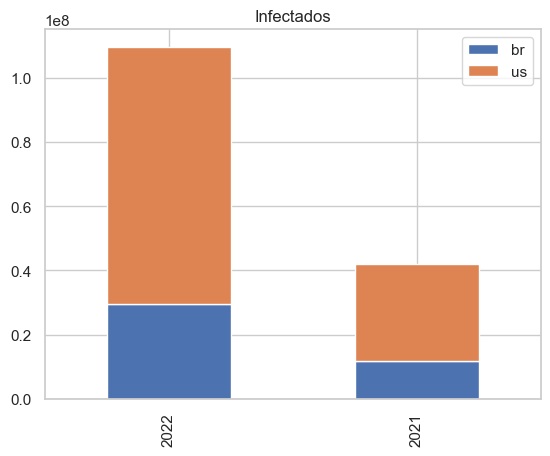

In [42]:
df_infectados = pd.DataFrame({"br": br_infectados, "us": us_infectados}, index=anos)
df_infectados.plot.bar(stacked=True)
plt.title("Infectados")
plt.show()

### d) Gráfico de barras comparando o número de mortos de Brasil e Estados Unidos em 20/mar.

In [43]:
br_mortes = [
    int(df_br[df_br["date"] == "2022-03-20"]["dead"]),
    int(df_br[df_br["date"] == "2021-03-20"]["dead"]),
]
us_mortes = [
    int(df_us[df_us["date"] == "2022-03-20"]["dead"]),
    int(df_us[df_us["date"] == "2021-03-20"]["dead"]),
]

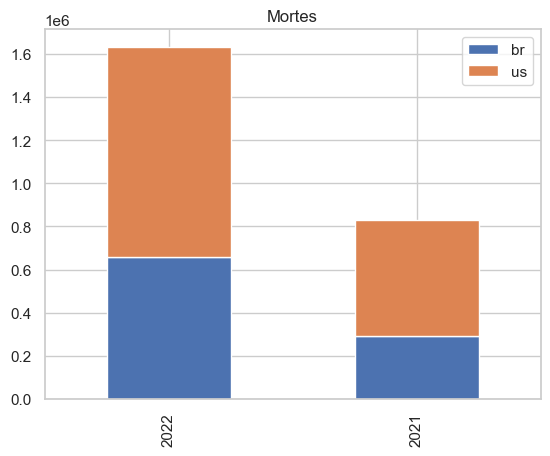

In [44]:
df_mortes = pd.DataFrame({"br": br_mortes, "us": us_mortes}, index=anos)
df_mortes.plot.bar(stacked=True)
plt.title("Mortes")
plt.show()

### e) Gráfico de barras comparando a taxa de mortalidade de Brasil e Estados Unidos em 20/mar.

In [45]:
br_mortalidade = [
    int(df_br[df_br["date"] == "2022-03-20"]["taxa_de_mortalidade"]),
    int(df_br[df_br["date"] == "2021-03-20"]["taxa_de_mortalidade"]),
    int(df_br[df_br["date"] == "2020-03-20"]["taxa_de_mortalidade"]),
]
us_mortalidade = [
    int(df_us[df_us["date"] == "2022-03-20"]["taxa_de_mortalidade"]),
    int(df_us[df_us["date"] == "2021-03-20"]["taxa_de_mortalidade"]),
    int(df_us[df_us["date"] == "2020-03-20"]["taxa_de_mortalidade"]),
]

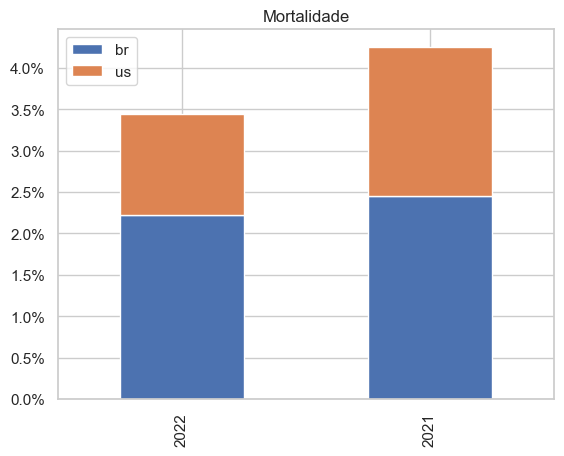

In [46]:
df_mortalidade = pd.DataFrame(
    {
        "br": (np.array(br_mortes) / br_infectados),
        "us": (np.array(us_mortes) / us_infectados),
    },
    index=anos,
)

_, ax = plt.subplots()
df_mortalidade.plot.bar(stacked=True, ax=ax)
plt.title("Mortalidade")

valores = ax.get_yticks()
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(["{:,.1%}".format(x) for x in valores])

plt.show()